### Individual performance of 10 participants
Shows each participant's learning curve in the three phases (pre, AI, post), their free-text strategy comments, bonus payment and AI ratings.

In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, MultipleLocator
import statistics
import numpy as np
from common import set_matplotlib_latex, plot_colours, set_axes_length
set_matplotlib_latex()

plot_width = 1.05
plot_height = 0.7

data_path = "../data/ColourCombo_10_anonymised.json"
phase_round_numbers = {
    "pre_treatment": [1, 2, 3],
    "ai": [4, 5, 6, 7, 8, 9],
    "post_treatment": [10, 11, 12]
}
participants_data = []

with open(data_path) as file:
    all_data = json.load(file)
    for participant_data in all_data:
            participants_data.append(participant_data)

In [61]:
def print_participant_info(participant_data):
    print(f"Participant id: {participant_data['id']}")
    print(f"Bonus payment: {participant_data['experimentData']['bonusReward']}")
    # print the AI ratings
    useful_ai_rounds = []
    for round_number in phase_round_numbers["ai"]:
        round_data = participant_data["experimentData"]["roundsData"][round_number]
        useful_ai_rounds.append(float(round_data["usefulAiRound"]))
    print(f"Followed: {participant_data['experimentData']['followedAi']}, Useful: {participant_data['experimentData']['usefulAi']}, Average: {np.round(statistics.mean(useful_ai_rounds), 1)}")
    print(f"Usefulness per round: {useful_ai_rounds}")
    print()
    print(f"Strategy with AI:\n{participant_data['experimentData']['strategyAi']}")
    print()
    print(f"Strategy without AI:\n{participant_data['experimentData']['strategyOwn']}")

def plot_performance_pre_ai_post_per_participant(participants):
    for participant_data in participants:
        print_participant_info(participant_data)
        phases_performances = {}
        for phase, round_numbers in phase_round_numbers.items():
            phase_performances = []
            for round_number in round_numbers:
                round_performance = []
                round_data = participant_data["experimentData"]["roundsData"][round_number]
                min_reward = round_data["landscape"]["minReward"]
                max_reward = round_data["landscape"]["maxReward"]
                for trial in round_data["trials"]:
                    reward = trial["noisyReward"]
                    relative_reward = (reward - min_reward) / (max_reward - min_reward) * 100
                    round_performance.append(relative_reward)
                phase_performances.append(round_performance)
            phase_performances = np.asarray(phase_performances)
            phases_performances[phase] = np.mean(phase_performances, axis=0)
        
        trial_numbers = list(range(1, 21)) 
        for phase, performances in phases_performances.items():
            label = "Pre" if phase == "pre_treatment" else "AI" if phase == "ai" else "Post"
            colour_index = 2 if phase == "pre_treatment" else 3 if phase == "ai" else 4
            plt.plot(trial_numbers, performances, color=plot_colours["distinctColours"][colour_index], label=label)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.gca().xaxis.set_major_locator(FixedLocator([1, 7, 14, 20]))
        plt.gca().yaxis.set_major_locator(MultipleLocator(base=10))
        set_axes_length(plot_width, plot_height)
        plt.show()
        
def plot_histograms_pre_ai_post():
    phases_scores_low = {}
    phases_scores_high = {}
    for phase in phase_round_numbers.keys():
        phases_scores_low[phase] = []
        phases_scores_high[phase] = []
    for participant_data in participants_data:
        phases_scores = {}
        for phase, round_numbers in phase_round_numbers.items():
            for round_number in round_numbers:
                round_score = participant_data["experimentData"]["roundsData"][round_number]["relativeScore"]
                if phase in phases_scores.keys():
                    phases_scores[phase].append(round_score * 100)
                else:
                    phases_scores[phase] = [round_score]
        if participant_data["experimentData"]["recommendationType"] == "low":
            for phase, scores in phases_scores.items():
                phases_scores_low[phase].extend(scores)
        else:
            for phase, scores in phases_scores.items():
                phases_scores_high[phase].extend(scores)
    bins = [0, 20, 40, 60, 80, 100]
    for phase in phase_round_numbers.keys():
        phase_label = "Pre" if phase == "pre_treatment" else "AI" if phase == "ai" else "Post"
        print(phase_label)
        plt.hist([phases_scores_low[phase], phases_scores_high[phase]], bins=bins, label=['Local', 'Global'], color=[plot_colours["local"], plot_colours["global"]])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        set_axes_length(plot_width, plot_height)
        plt.gca().xaxis.set_major_locator(FixedLocator(bins))
        plt.show()

### Mean round scores across the Pre, AI, Post phases

Pre


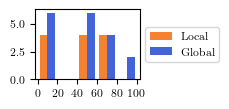

AI


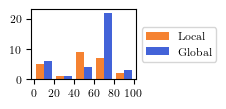

Post


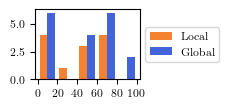

In [62]:
plot_histograms_pre_ai_post()

### Results of participants in the local setting

Participant id: 3
Bonus payment: 0.67
Followed: 1, Useful: 3, Average: 3.5
Usefulness per round: [1.0, 4.0, 4.0, 4.0, 4.0, 4.0]

Strategy with AI:
Trying its suggestion - finding it was a detriment - disregarding

Strategy without AI:
Getting it to above average and keeping it


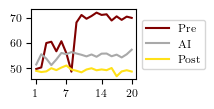

Participant id: 5
Bonus payment: 0.33
Followed: 4, Useful: 4, Average: 4.0
Usefulness per round: [4.0, 4.0, 5.0, 2.0, 4.0, 5.0]

Strategy with AI:
i used mind game as well

Strategy without AI:
i used a mind game


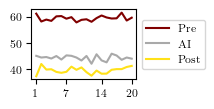

Participant id: 11
Bonus payment: 0.82
Followed: 5, Useful: 4, Average: 4.5
Usefulness per round: [3.0, 6.0, 4.0, 5.0, 5.0, 4.0]

Strategy with AI:
Followed AI's suggestion when I compare the combo with that which gave me the highest point

Strategy without AI:
I looked for the combo with the highest points first by trying different combos


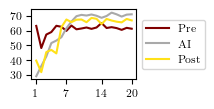

Participant id: 13
Bonus payment: 1.37
Followed: 4, Useful: 5, Average: 3.8
Usefulness per round: [5.0, 4.0, 2.0, 3.0, 5.0, 4.0]

Strategy with AI:
In some I used their suggestions, but in others I varied with mine.

Strategy without AI:
I used the color combination until I found one that gave me more points.


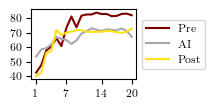

In [47]:
local_participants = [participant_data for participant_data in participants_data if participant_data["experimentData"]["recommendationType"] == "low"]

plot_performance_pre_ai_post_per_participant(local_participants)

### Results of participants in the global setting

Participant id: 4
Bonus payment: 1.62
Followed: 5, Useful: 2, Average: 4.5
Usefulness per round: [6.0, 4.0, 5.0, 4.0, 3.0, 5.0]

Strategy with AI:
Following the AI's instructions. 

Strategy without AI:
Trying to find a combination that yielded a score >100 and then using that combination.


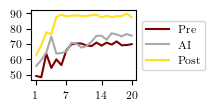

Participant id: 6
Bonus payment: 1.76
Followed: 2, Useful: 4, Average: 3.7
Usefulness per round: [6.0, 3.0, 3.0, 4.0, 3.0, 3.0]

Strategy with AI:
I tried using the AIs suggestions but they didn't seem to help with my strategy

Strategy without AI:
I went through each rectangle at a time and when I thought that it went up enough I moved onto the next one


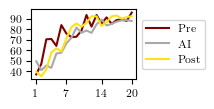

Participant id: 8
Bonus payment: 1.31
Followed: 5, Useful: 5, Average: 5.0
Usefulness per round: [6.0, 5.0, 5.0, 5.0, 5.0, 4.0]

Strategy with AI:
didnt look at ai until i'd given it some data to assess from

Strategy without AI:
doing all of the same colour then trying to combine the highest scoring ones


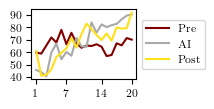

Participant id: 10
Bonus payment: 1
Followed: 4, Useful: 3, Average: 3.0
Usefulness per round: [3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

Strategy with AI:
sticking with a score above average

Strategy without AI:
sticking with a score above average


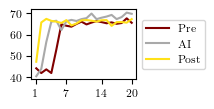

Participant id: 12
Bonus payment: 0.5
Followed: 6, Useful: 6, Average: 6.5
Usefulness per round: [7.0, 7.0, 7.0, 7.0, 7.0, 4.0]

Strategy with AI:
preferences

Strategy without AI:
selecting valuable colour combo


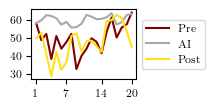

Participant id: 14
Bonus payment: 1.6
Followed: 4, Useful: 5, Average: 3.3
Usefulness per round: [5.0, 4.0, 3.0, 2.0, 4.0, 2.0]

Strategy with AI:
I sometimes followed what they said

Strategy without AI:
Just to try find the best colours


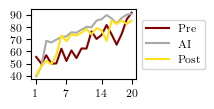

In [48]:
global_participants = [participant_data for participant_data in participants_data if participant_data["experimentData"]["recommendationType"] == "high"]

plot_performance_pre_ai_post_per_participant(global_participants)